Calcul de la différence de densité entre les orbitales moléculaires calculées avec ou sans champ

voici un exemple de input (fichier h2o_scf_sp_req.com) : 

%nprocshared=8

%chk=h2o_scf_sp_req.chk
#HF/6-31g** sp gfinput pop=full scf=(maxcycle=600) geom=nocrowd

H2O PES

0 1
 O   0.000000    0.000000    0.113529
 
 H   0.000000    0.753022   -0.454115
 
 H   0.000000   -0.753022   -0.454115

Pour créer le fichier .cub, il faut créer un cube.input :

-1, -9.0, -9.0, -9.0

1, 0.0, 0.0, 0.0

99, 0.0, .175, 0.0

99, 0.0, 0.0, .175


Le calcul (g09 h2o_scf_sp_req.com) créera le fichier chk non formaté h2o_scf_sp_req.chk. Il faut premièrement créer un fichier formaté : 

formchk h2o_scf_sp_req.chk

Puis lancer la commande : 

> cubegen 8 MO=1 h2o_scf_sp_req.fchk h2o_scf_sp_req_mo1.cub -1 n < cube.input

refaire ces même étapes en ajoutant un champ :

#HF/6-31g** sp gfinput pop=full scf=(maxcycle=600) geom=nocrowd field=z+500

Les fichiers avec champ ont _500 ou _m500 (champ négatif) ajouté dans les noms de fichier 

 


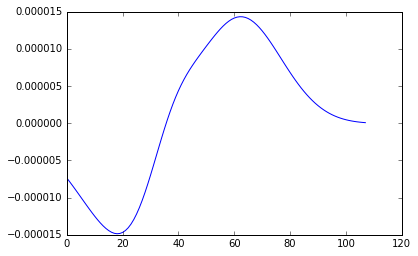

In [1]:

import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline 
cubeinput="cube.input"
lines  = open(cubeinput).readlines()
xmin=float(lines[0][4:8])
ymin=float(lines[0][10:14])
zmin=float(lines[0][16:22])
incy=float(lines[2][9:14])

incz=float(lines[3][14:19])

cubefilesanschamp="h2o_scf_sp_req_mo1.cub"
temp=[]
dens_nofield=[]
num=0
ytemp=[]
ztemp=[]
z=zmin
y=ymin
zmat=[]
ymat=[]
for line in open(cubefilesanschamp).readlines():
    
    temp.append(line[0:14])
    ztemp.append(z)
    ytemp.append(y)
    z=z+incz
    #print(line[0:14])
    temp.append(line[14:27])
    ztemp.append(z)
    ytemp.append(y)
    z=z+incz
    #print(line[14:27])
    temp.append(line[27:40])
    ztemp.append(z)
    ytemp.append(y)
    z=z+incz
    #print(line[27:40])
    temp.append(line[40:53])
    ztemp.append(z)
    ytemp.append(y)
    z=z+incz
    #print(line[40:53])
    temp.append(line[53:66])
    ztemp.append(z)
    ytemp.append(y)
    z=z+incz
    
    #print(line[53:66])
    temp.append(line[66:78])
    ztemp.append(z)
    ytemp.append(y)
    z=z+incz
    #print(line[66:78])
    num=num+6
    if num==108:
        dens_nofield.append(np.array(temp))
        temp=[]
        num=0
        zmat.append(np.array(ztemp, dtype=float))
        ymat.append(np.array(ytemp, dtype=float))
        ztemp=[]
        ytemp=[]
        y=y+incy
        
plt.plot(dens_nofield[3])
plt.show()
#print(ymat)


In [34]:
0

0

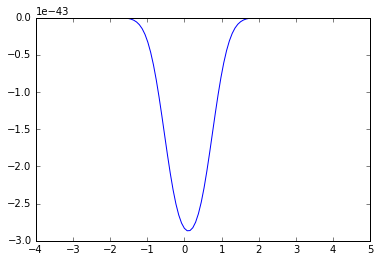

In [2]:
from tools import getdens
dens_nofield=getdens("h2o_scf_sp_req_mo1.cub")
dens_nofield=np.array(dens_nofield).transpose()
dens_field_500=getdens("h2o_scf_sp_req__500_mo1.cub")
dens_field_500=np.array(dens_field_500).transpose()
zmat, ymat = np.mgrid[slice(ymin, ymin+108*incy , incy),
                slice(zmin, zmin+108*incz , incz)]
zmat=zmat*1.8897259886
ymat=ymat*1.8897259886
plt.plot(ymat[0],dens_field_500[0])
plt.show()

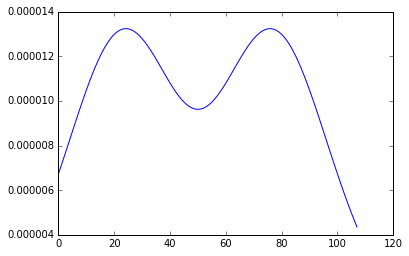

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline  
diff=np.array(dens_field_500, dtype=float)-np.array(dens_nofield, dtype=float)
#diff=diff.transpose()
diff_square=np.array(dens_field_500, dtype=float)**2-np.array(dens_nofield, dtype=float)**2
diff_square=diff_square.transpose()
plt.plot(diff[1])
plt.show()

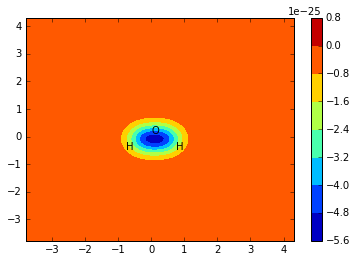

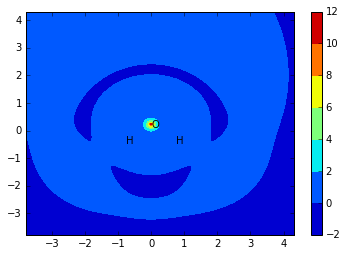

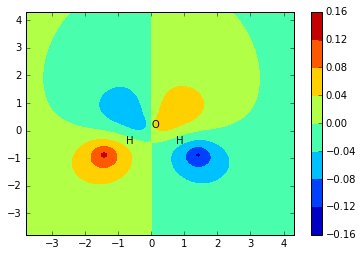

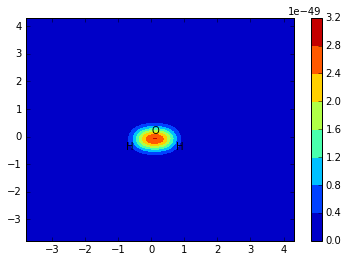

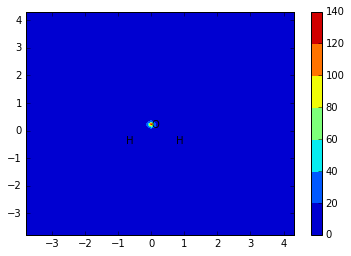

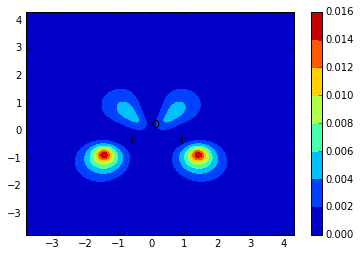

In [6]:
fig1=plt.figure()
nbins=25
dens_field_500=np.array(dens_field_500, dtype=float)
leveltot = plt.MaxNLocator(nbins=nbins).tick_values(dens_field_500.min(), dens_field_500.max())
cf=plt.contourf(ymat,zmat,dens_field_500)
#plt.axis([-xmin, xmin, -zmin, zmin])
plt.annotate('O',(0.0,0.113529))
plt.annotate('H',(-0.753022,-0.454115))
plt.annotate('H',(0.753022,-0.454115))
fig1.colorbar(cf)
plt.show()

dens_nofield=np.array(dens_nofield, dtype=float)
fig2=plt.figure()
nbins=25
leveltot = plt.MaxNLocator(nbins=nbins).tick_values(dens_nofield.min(), dens_nofield.max())
cf=plt.contourf(ymat,zmat,dens_nofield)
#plt.axis([-xmin, xmin, -zmin, zmin])
plt.annotate('O',(0.0,0.113529))
plt.annotate('H',(-0.753022,-0.454115))
plt.annotate('H',(0.753022,-0.454115))
fig2.colorbar(cf)
plt.show()


fig3 = plt.figure()
fig3.canvas.set_window_title('spectre canal')
nbins=25
leveltot = plt.MaxNLocator(nbins=nbins).tick_values(diff.min(), diff.max())
#cf=plt.contourf(ymat,zmat ,diff)
cf=plt.contourf(ymat,zmat,diff)
#plt.axis([-xmin, xmin, -zmin, zmin])
plt.annotate('O',(0.0,0.113529))
plt.annotate('H',(-0.753022,-0.454115))
plt.annotate('H',(0.753022,-0.454115))
fig3.colorbar(cf)
plt.show()

dens_field_500_square=np.array(dens_field_500)**2
fig1a=plt.figure()
nbins=25
leveltot = plt.MaxNLocator(nbins=nbins).tick_values(dens_field_500_square.min(), dens_field_500_square.max())
cf=plt.contourf(ymat,zmat,dens_field_500_square)
#plt.axis([-xmin, xmin, -zmin, zmin])
plt.annotate('O',(0.0,0.113529))
plt.annotate('H',(-0.753022,-0.454115))
plt.annotate('H',(0.753022,-0.454115))
fig1a.colorbar(cf)
plt.show()

dens_nofield_square=np.array(dens_nofield)**2
fig2a=plt.figure()
nbins=25
leveltot = plt.MaxNLocator(nbins=nbins).tick_values(dens_nofield_square.min(), dens_nofield_square.max())
cf=plt.contourf(ymat,zmat,dens_nofield_square)
#plt.axis([-xmin, xmin, -zmin, zmin])
plt.annotate('O',(0.0,0.113529))
plt.annotate('H',(-0.753022,-0.454115))
plt.annotate('H',(0.753022,-0.454115))
fig2a.colorbar(cf)
plt.show()


fig3a = plt.figure()
fig3a.canvas.set_window_title('spectre canal')
nbins=25
leveltot = plt.MaxNLocator(nbins=nbins).tick_values(diff_square.min(), diff_square.max())
#cf=plt.contourf(ymat,zmat ,diff)
cf=plt.contourf(ymat,zmat,diff_square)
plt.annotate('O',(0.0,0.113529))
plt.annotate('H',(-0.753022,-0.454115))
plt.annotate('H',(0.753022,-0.454115))
#plt.axis([-xmin, xmin, -zmin, zmin])
plt.annotate('O',(0.0,0.113529))
plt.annotate('H',(-0.753022,-0.454115))
plt.annotate('H',(0.753022,-0.454115))
fig3a.colorbar(cf)
plt.show()



In [1]:
mo=3
field=5000
import numpy as np
from tools import getdens


h2o_scf_sp_req_mo2=np.array(getdens("h2o_scf_sp_req_mo"+str(mo)+".cub"), dtype=float).transpose()
h2o_scf_sp_req_plus_mo2=np.array(getdens("h2o_scf_sp_req_"+str(field)+"_mo"+str(mo)+".cub"), dtype=float) .transpose()    
h2o_scf_sp_req_moins_mo2=np.array(getdens("h2o_scf_sp_req_m"+str(field)+"_mo"+str(mo)+".cub"), dtype=float) .transpose()    

diff=np.array(h2o_scf_sp_req_plus_mo2, dtype=float)-np.array(h2o_scf_sp_req_mo2, dtype=float)
diffm=np.array(h2o_scf_sp_req_moins_mo2, dtype=float)-np.array(h2o_scf_sp_req_mo2, dtype=float)
diff_square=diff**2
diffm_square=diffm**2

In [2]:
fig1=plt.figure()
nbins=50

leveltot = plt.MaxNLocator(nbins=nbins).tick_values(h2o_scf_sp_req_plus_mo2.min(), h2o_scf_sp_req_plus_mo2.max())
cf=plt.contourf(ymat,zmat,h2o_scf_sp_req_plus_mo2,levels=leveltot)
#plt.axis([-xmin, xmin, -zmin, zmin])
plt.plot(0.0,0.113529*1.8897259886, 'ro')
plt.plot(-0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
plt.plot(0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
#plt.annotate('O',(0.0,0.113529))
#plt.annotate('H',(-0.753022,-0.454115))
#plt.annotate('H',(0.753022,-0.454115))
fig1.colorbar(cf)
plt.xlabel('Y (u.a.)')
plt.ylabel('Z (u.a.)')
plt.axis([-3, 3, -3, 3])
plt.savefig('H2O_mo'+str(mo)+'_'+str(field)+'.png')

plt.show()
plt.close()


fig1=plt.figure()
nbins=25

leveltot = plt.MaxNLocator(nbins=nbins).tick_values(h2o_scf_sp_req_moins_mo2.min(), h2o_scf_sp_req_moins_mo2.max())
cf=plt.contourf(ymat,zmat,h2o_scf_sp_req_moins_mo2,levels=leveltot)
#plt.axis([-xmin, xmin, -zmin, zmin])
plt.plot(0.0,0.113529*1.8897259886, 'ro')
plt.plot(-0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
plt.plot(0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
fig1.colorbar(cf)
plt.xlabel('Y (u.a.)')
plt.ylabel('Z (u.a.)')
plt.axis([-3, 3, -3, 3])
plt.savefig('H2O_mo'+str(mo)+'_m'+str(field)+'.png')
plt.show()


fig2=plt.figure()
nbins=25
leveltot = plt.MaxNLocator(nbins=nbins).tick_values(h2o_scf_sp_req_mo2.min(), h2o_scf_sp_req_mo2.max())
cf=plt.contourf(ymat,zmat,h2o_scf_sp_req_mo2,levels=leveltot)
#plt.axis([-xmin, xmin, -zmin, zmin])
plt.plot(0.0,0.113529*1.8897259886, 'ro')
plt.plot(-0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
plt.plot(0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
fig2.colorbar(cf)
plt.xlabel('Y (u.a.)')
plt.ylabel('Z (u.a.)')
plt.axis([-3, 3, -3, 3])
plt.savefig('H2O_mo'+str(mo)+'.png')
plt.show()



fig3 = plt.figure()
nbins=25
leveltot = plt.MaxNLocator(nbins=nbins).tick_values(diffm.min(), diffm.max())
#cf=plt.contourf(ymat,zmat ,diff)
cf=plt.contourf(ymat,zmat,diff,levels=leveltot)
#plt.axis([-xmin, xmin, -zmin, zmin])
plt.plot(0.0,0.113529*1.8897259886, 'ro')
plt.plot(-0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
plt.plot(0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
fig3.colorbar(cf)
plt.xlabel('Y (u.a.)')
plt.ylabel('Z (u.a.)')
plt.axis([-3, 3, -3, 3])
plt.savefig('H2O_mo'+str(mo)+'_diff.png')
plt.show()
plt.close()


fig3b = plt.figure()
nbins=25
leveltot = plt.MaxNLocator(nbins=nbins).tick_values(diffm.min(), diffm.max())
#cf=plt.contourf(ymat,zmat ,diff)
cf=plt.contourf(ymat,zmat,diffm,levels=leveltot)
#plt.axis([-xmin, xmin, -zmin, zmin])
plt.plot(0.0,0.113529*1.8897259886, 'ro')
plt.plot(-0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
plt.plot(0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
fig3b.colorbar(cf)
plt.xlabel('Y (u.a.)')
plt.ylabel('Z (u.a.)')
plt.axis([-3, 3, -3, 3])
plt.savefig('H2O_mo'+str(mo)+'_diffm.png')
plt.show()



dens_field_500_square=np.array(h2o_scf_sp_req_500_mo2)**2
fig1a=plt.figure()
nbins=25
leveltot = plt.MaxNLocator(nbins=nbins).tick_values(dens_field_500_square.min(), dens_field_500_square.max())
cf=plt.contourf(ymat,zmat,dens_field_500_square)
#plt.axis([-xmin, xmin, -zmin, zmin])
plt.plot(0.0,0.113529*1.8897259886, 'ro')
plt.plot(-0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
plt.plot(0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
fig1a.colorbar(cf)
plt.show()

dens_nofield_square=np.array(h2o_scf_sp_req_mo2)**2
fig2a=plt.figure()
nbins=25
leveltot = plt.MaxNLocator(nbins=nbins).tick_values(dens_nofield_square.min(), dens_nofield_square.max())
cf=plt.contourf(ymat,zmat,dens_nofield_square)
plt.plot(0.0,0.113529*1.8897259886, 'ro')
plt.plot(-0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
plt.plot(0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
fig2a.colorbar(cf)
plt.show()


fig3a = plt.figure()
fig3a.canvas.set_window_title('spectre canal')
nbins=25
leveltot = plt.MaxNLocator(nbins=nbins).tick_values(diff_square.min(), diff_square.max())
#cf=plt.contourf(ymat,zmat ,diff)
cf=plt.contourf(ymat,zmat,diff_square,levels=leveltot)

plt.plot(0.0,0.113529*1.8897259886, 'ro')
plt.plot(-0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
plt.plot(0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
#plt.axis([-xmin, xmin, -zmin, zmin])
fig3a.colorbar(cf)
plt.show()
plt.close()

fig3a = plt.figure()
fig3a.canvas.set_window_title('spectre canal')
nbins=25
leveltot = plt.MaxNLocator(nbins=nbins).tick_values(diff_square.min(), diff_square.max())
#cf=plt.contourf(ymat,zmat ,diff)
cf=plt.contourf(ymat,zmat,diffm_square,levels=leveltot)

plt.plot(0.0,0.113529*1.8897259886, 'ro')
plt.plot(-0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
plt.plot(0.753022*1.8897259886,-0.454115*1.8897259886, 'wo')
#plt.axis([-xmin, xmin, -zmin, zmin])
fig3a.colorbar(cf)
plt.show()


NameError: name 'plt' is not defined

In [10]:
mo="tot"
field=5000
import numpy as np
from tools import getdens


h2o_scf_sp_req_mo2=np.array(getdens("h2o_scf_sp_req_"+str(mo)+".cub"), dtype=float).transpose()
h2o_scf_sp_req_plus_mo2=np.array(getdens("h2o_scf_sp_req_"+str(field)+"_"+str(mo)+".cub"), dtype=float) .transpose()    
h2o_scf_sp_req_moins_mo2=np.array(getdens("h2o_scf_sp_req_m"+str(field)+"_"+str(mo)+".cub"), dtype=float) .transpose()    

diff=np.array(h2o_scf_sp_req_plus_mo2, dtype=float)-np.array(h2o_scf_sp_req_mo2, dtype=float)
diffm=np.array(h2o_scf_sp_req_moins_mo2, dtype=float)-np.array(h2o_scf_sp_req_mo2, dtype=float)
diff_square=diff**2
diffm_square=diffm**2

cmap =Accent


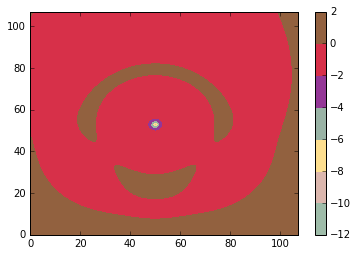

cmap =Accent_r


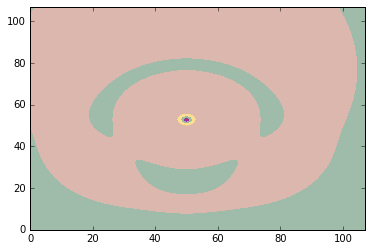

cmap =Blues


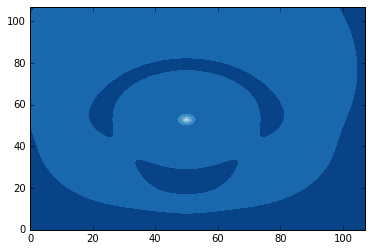

cmap =Blues_r


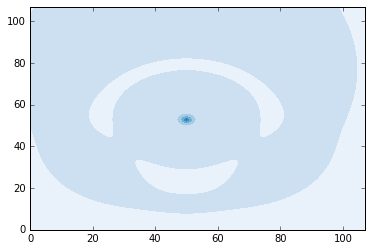

cmap =BrBG


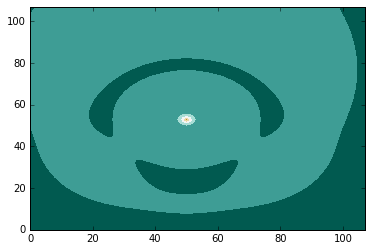

cmap =BrBG_r


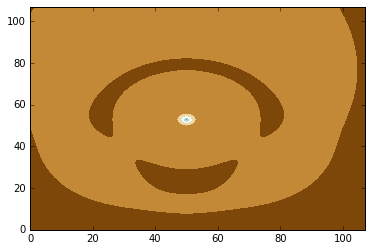

cmap =BuGn


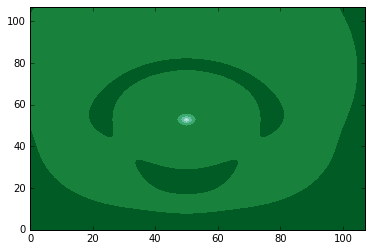

cmap =BuGn_r


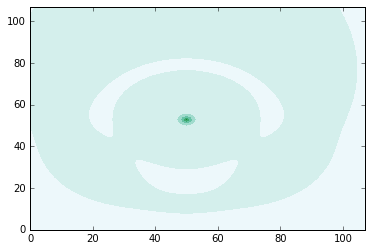

cmap =BuPu


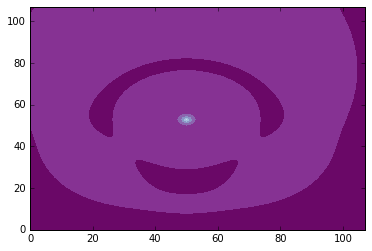

cmap =BuPu_r


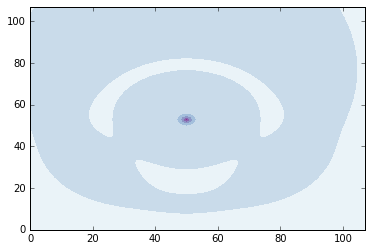

cmap =CMRmap


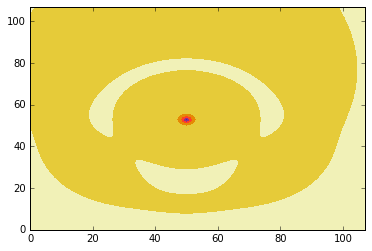

cmap =CMRmap_r


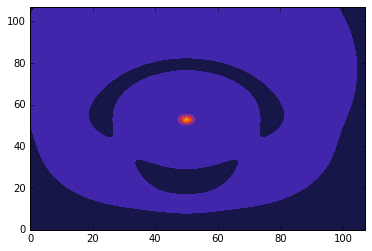

cmap =Dark2


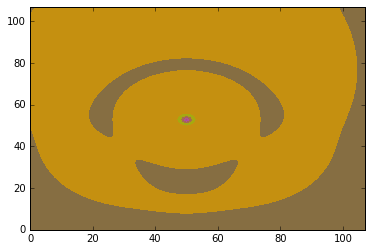

cmap =Dark2_r


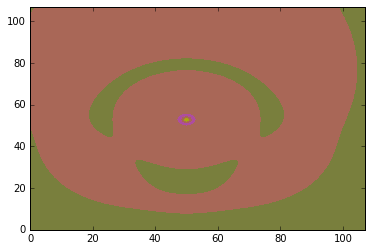

cmap =GnBu


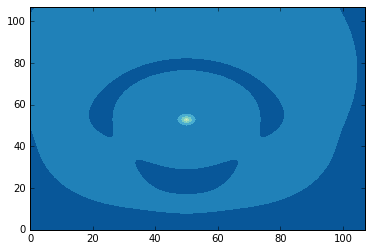

cmap =GnBu_r


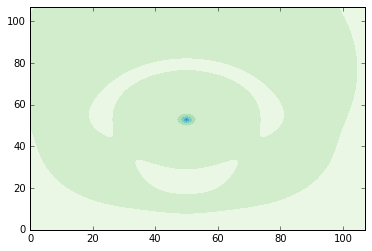

cmap =Greens


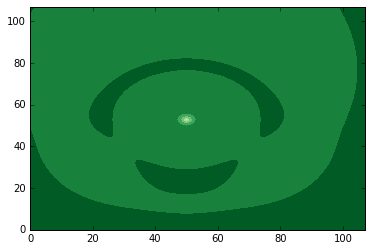

cmap =Greens_r


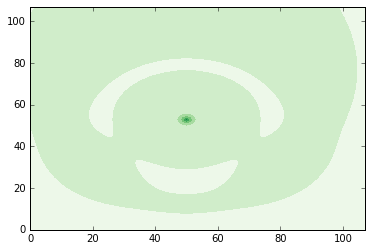

cmap =Greys


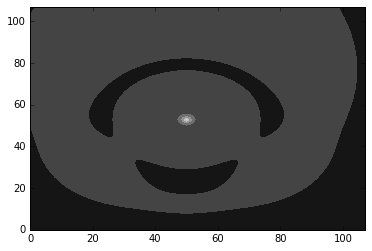

cmap =Greys_r


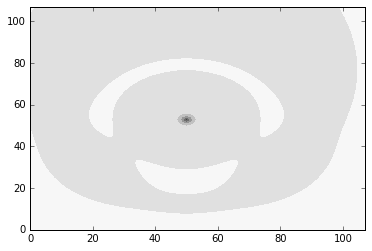

cmap =OrRd


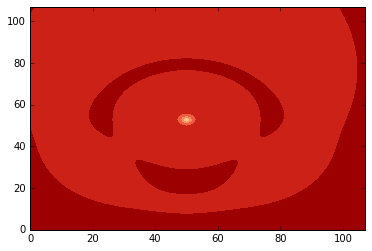

cmap =OrRd_r


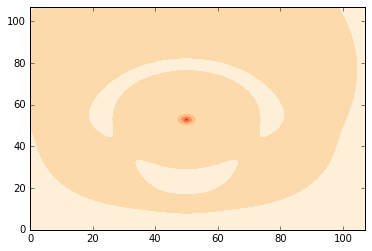

cmap =Oranges


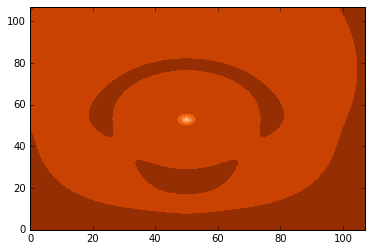

cmap =Oranges_r


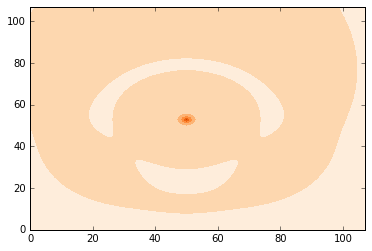

cmap =PRGn


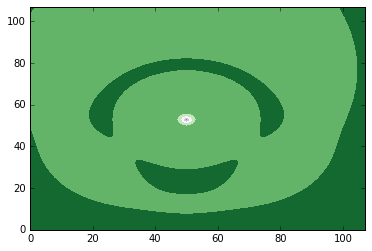

cmap =PRGn_r


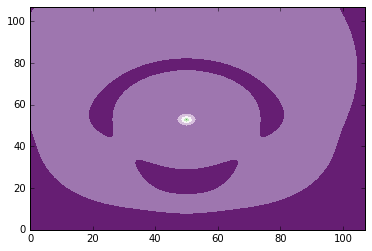

cmap =Paired


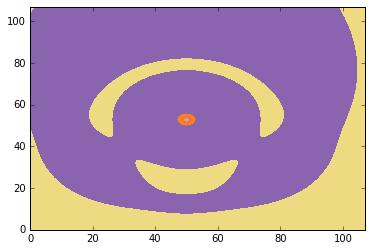

cmap =Paired_r


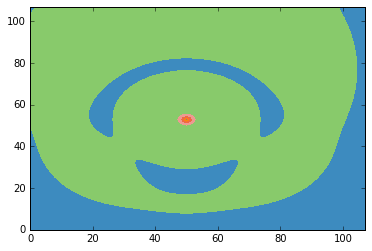

cmap =Pastel1


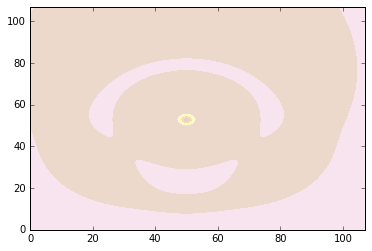

cmap =Pastel1_r


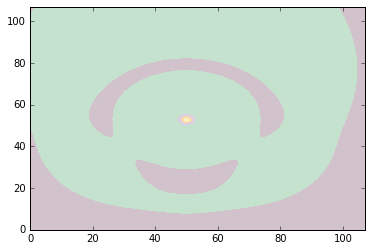

cmap =Pastel2


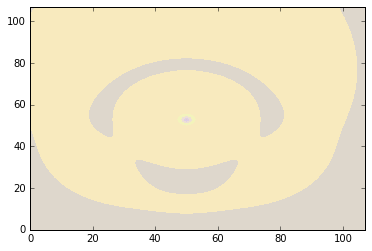

cmap =Pastel2_r


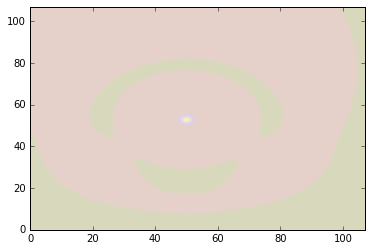

cmap =PiYG


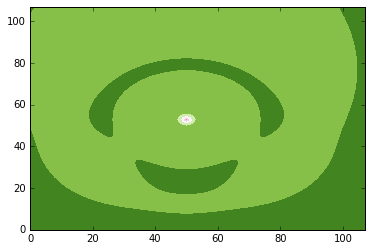

cmap =PiYG_r


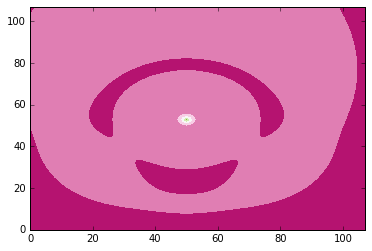

cmap =PuBu


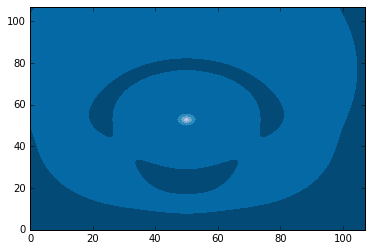

cmap =PuBuGn


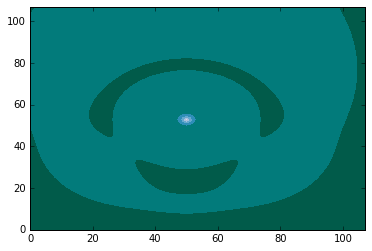

cmap =PuBuGn_r


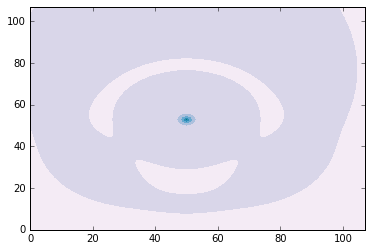

cmap =PuBu_r


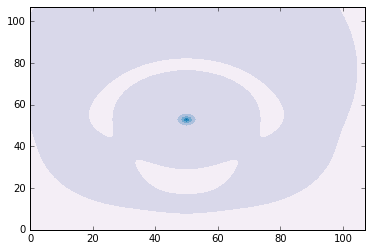

cmap =PuOr


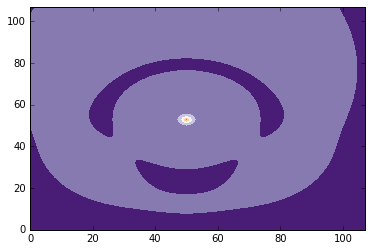

cmap =PuOr_r


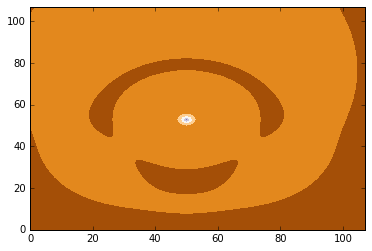

cmap =PuRd


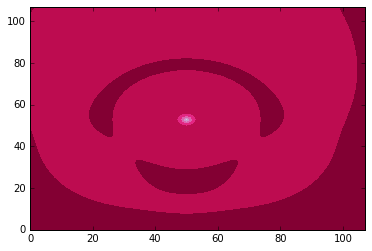

cmap =PuRd_r


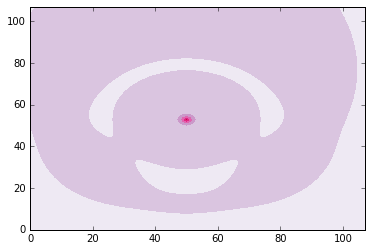

cmap =Purples


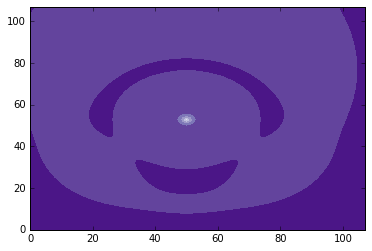

cmap =Purples_r


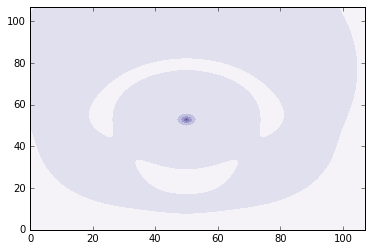

cmap =RdBu


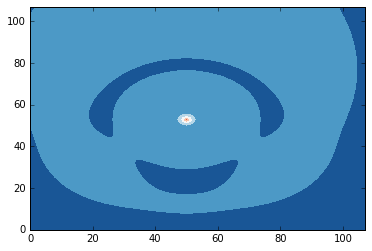

cmap =RdBu_r


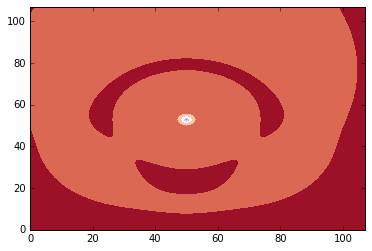

cmap =RdGy


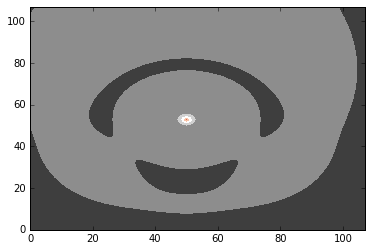

cmap =RdGy_r


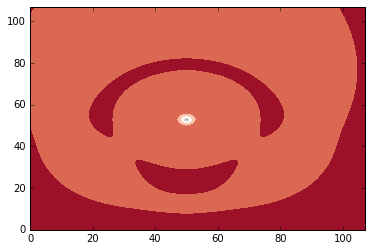

cmap =RdPu


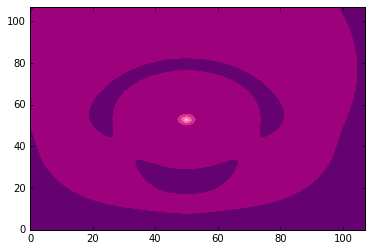

cmap =RdPu_r


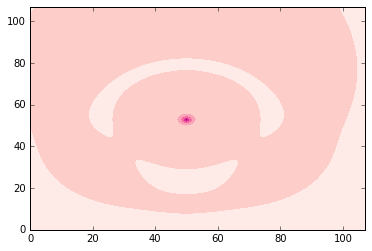

cmap =RdYlBu


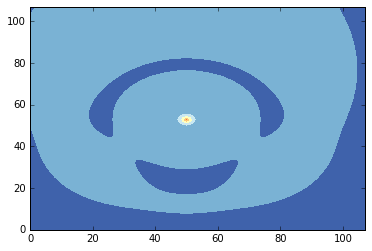

cmap =RdYlBu_r


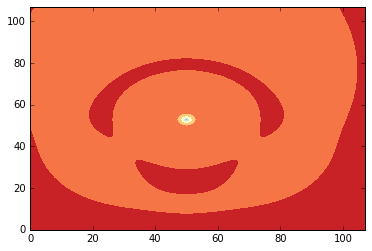

cmap =RdYlGn


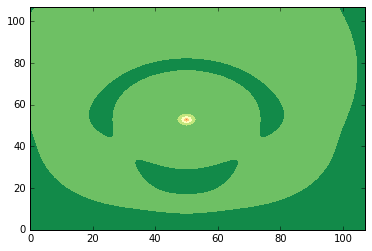

cmap =RdYlGn_r


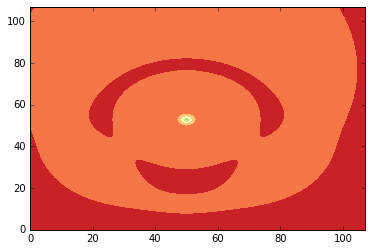

cmap =Reds


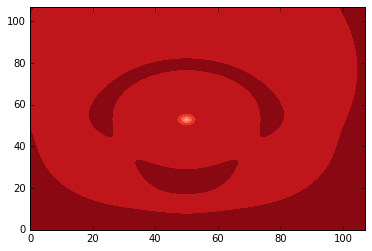

cmap =Reds_r


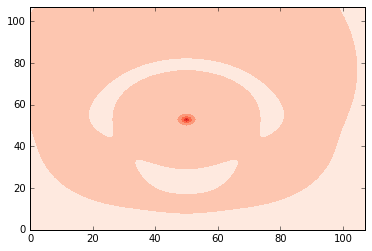

cmap =Set1


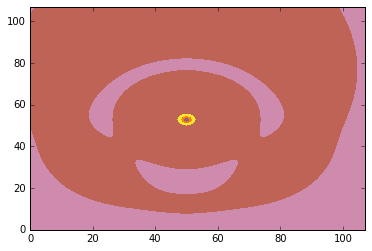

cmap =Set1_r


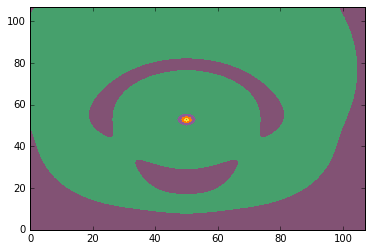

cmap =Set2


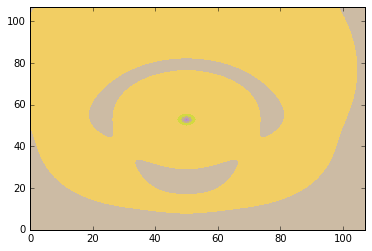

cmap =Set2_r


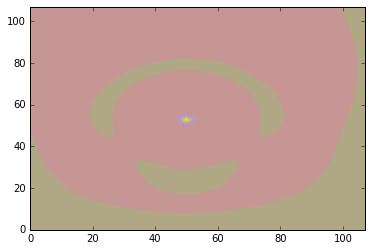

cmap =Set3


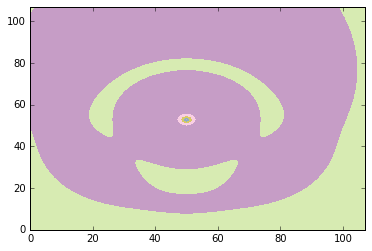

cmap =Set3_r


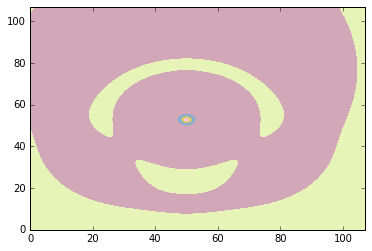

cmap =Spectral


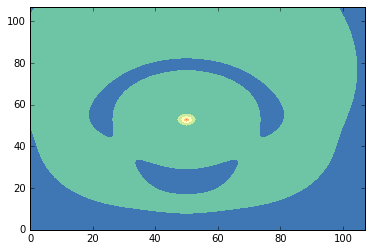

cmap =Spectral_r


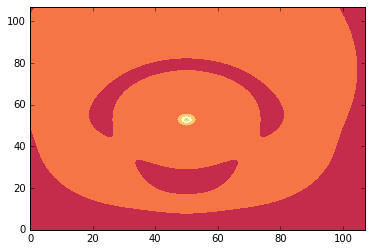

cmap =Wistia


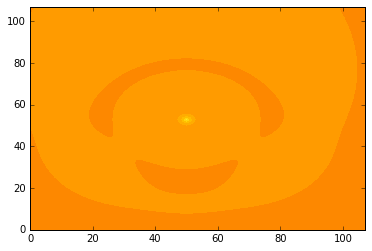

cmap =Wistia_r


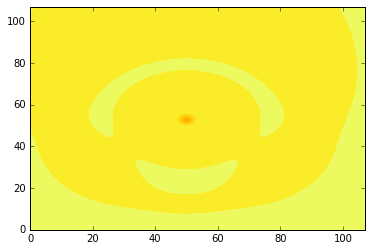

cmap =YlGn


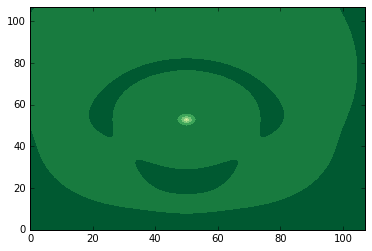

cmap =YlGnBu


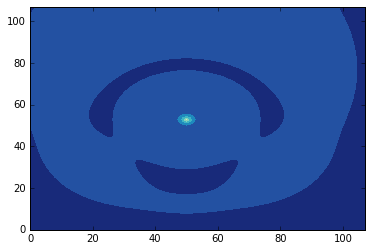

cmap =YlGnBu_r


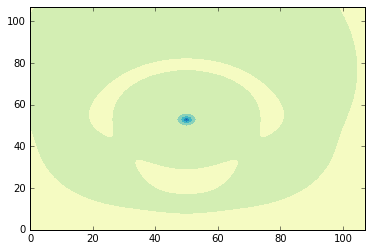

cmap =YlGn_r


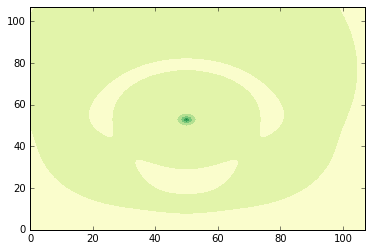

cmap =YlOrBr


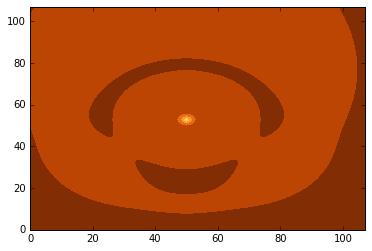

cmap =YlOrBr_r


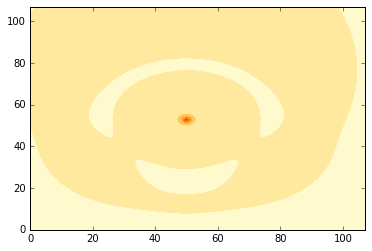

cmap =YlOrRd


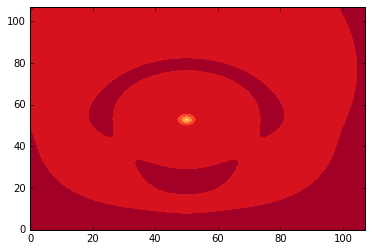

cmap =YlOrRd_r


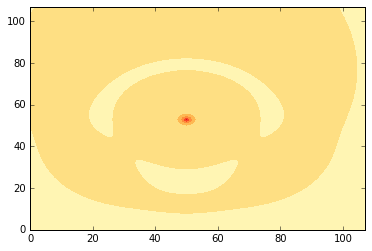

cmap =afmhot


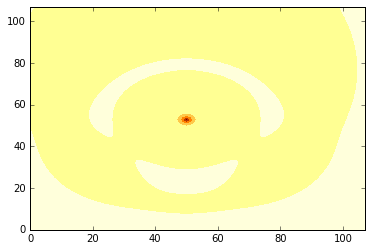

cmap =afmhot_r


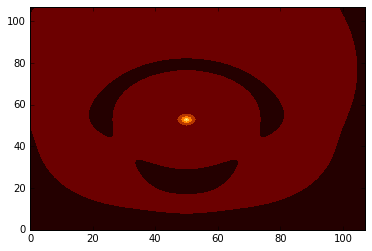

cmap =autumn


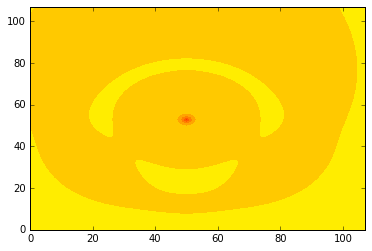

cmap =autumn_r


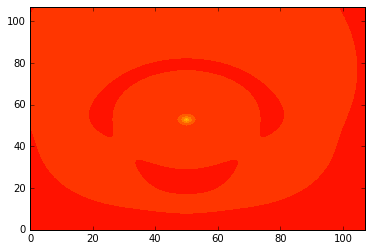

cmap =binary


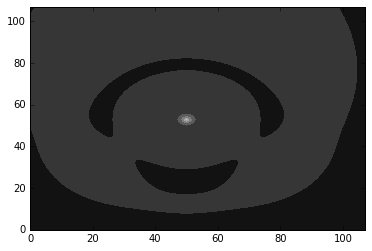

cmap =binary_r


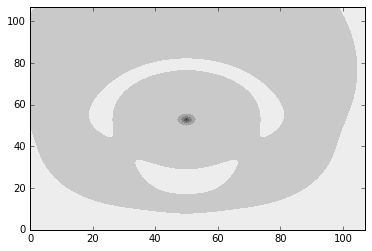

cmap =bone


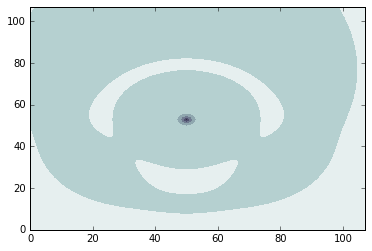

cmap =bone_r


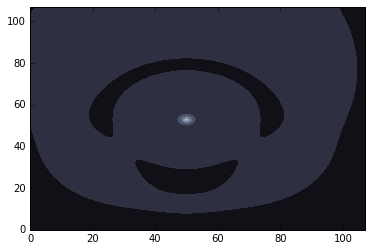

cmap =brg


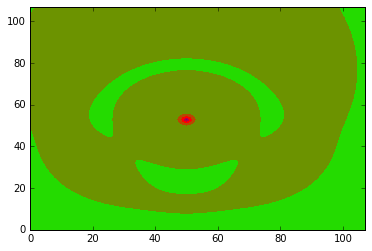

cmap =brg_r


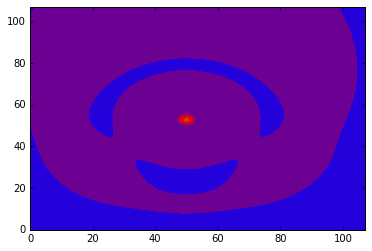

cmap =bwr


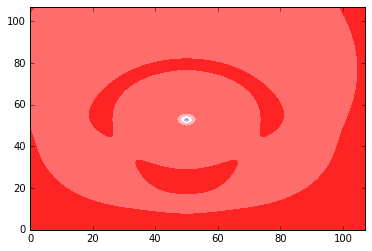

cmap =bwr_r


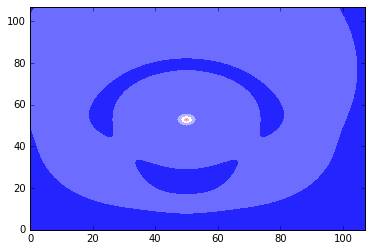

cmap =cool


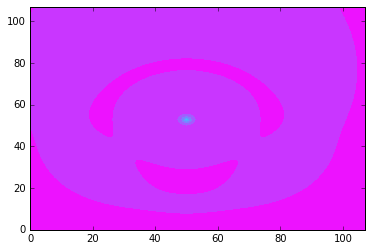

cmap =cool_r


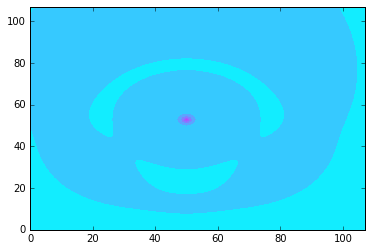

cmap =coolwarm


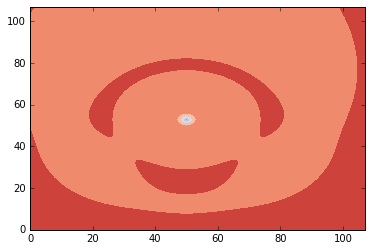

cmap =coolwarm_r


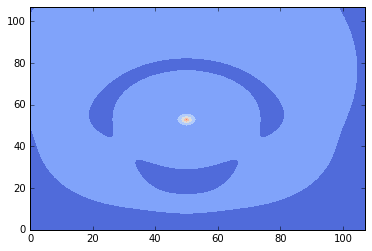

cmap =copper


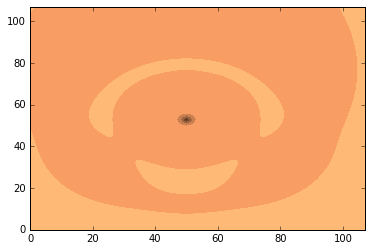

cmap =copper_r


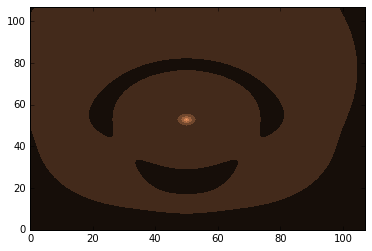

cmap =cubehelix


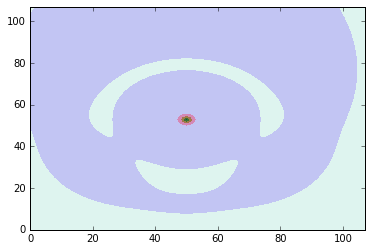

cmap =cubehelix_r


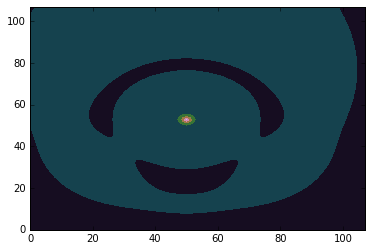

cmap =flag


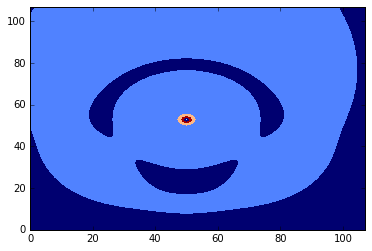

cmap =flag_r


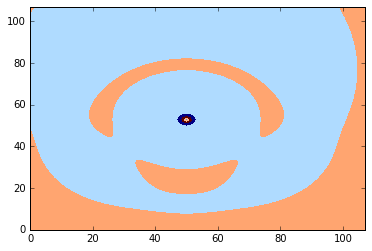

cmap =gist_earth


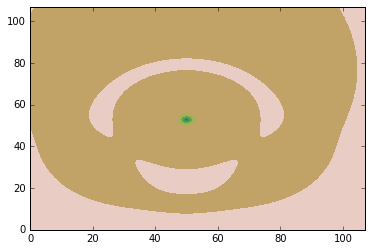

cmap =gist_earth_r


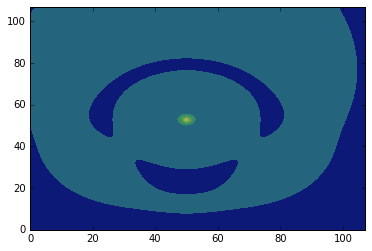

cmap =gist_gray


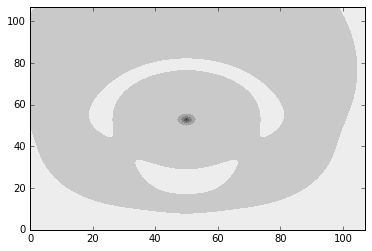

cmap =gist_gray_r


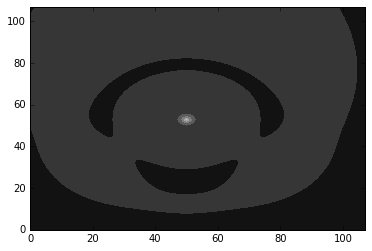

cmap =gist_heat


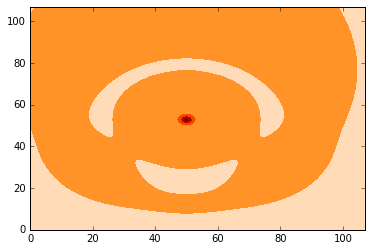

cmap =gist_heat_r


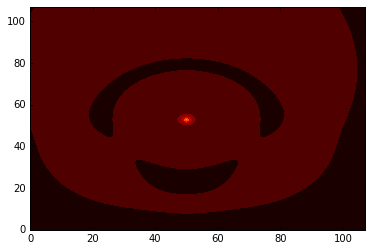

cmap =gist_ncar


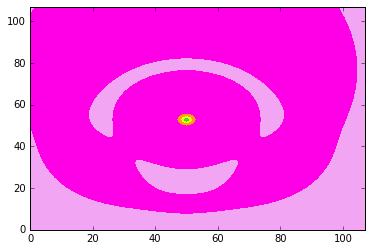

cmap =gist_ncar_r


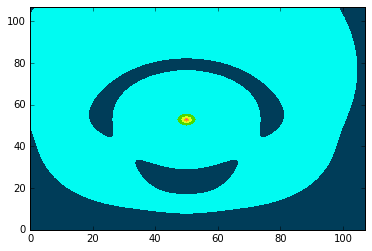

cmap =gist_rainbow


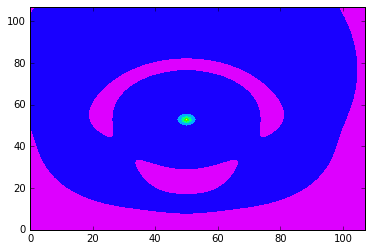

cmap =gist_rainbow_r


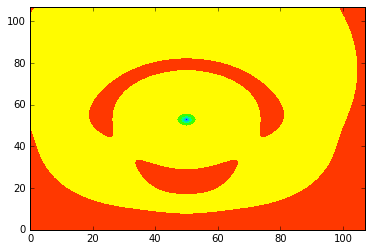

cmap =gist_stern


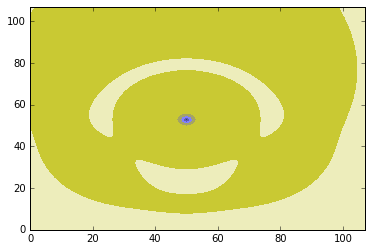

cmap =gist_stern_r


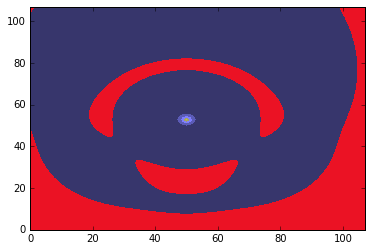

cmap =gist_yarg


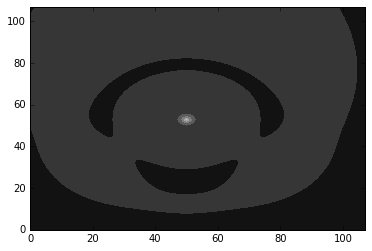

cmap =gist_yarg_r


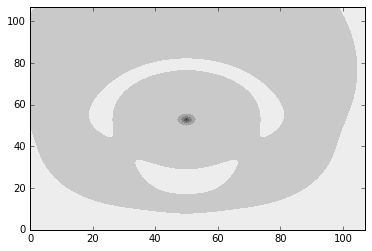

cmap =gnuplot


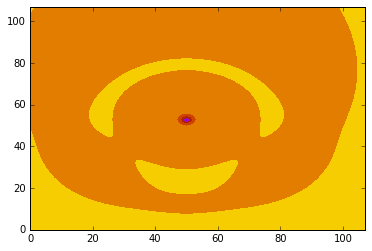

cmap =gnuplot2


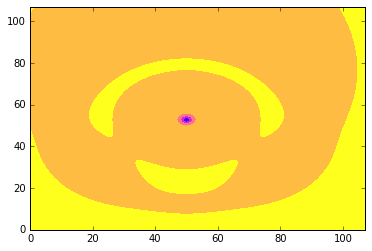

cmap =gnuplot2_r


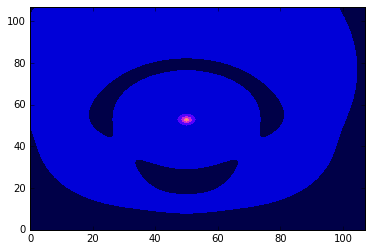

cmap =gnuplot_r


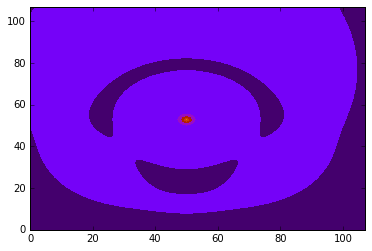

cmap =gray


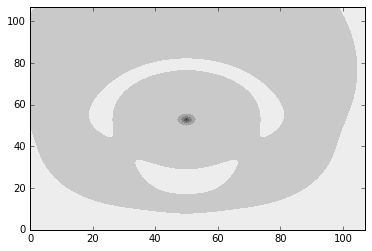

cmap =gray_r


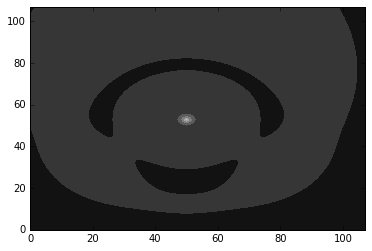

cmap =hot


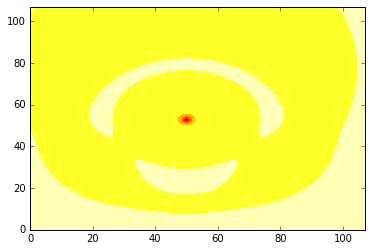

cmap =hot_r


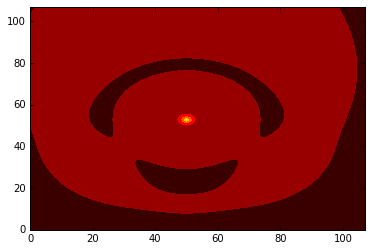

cmap =hsv


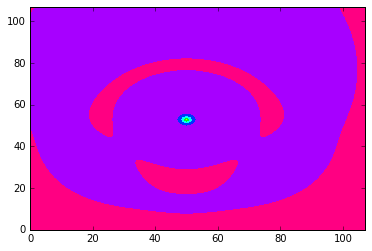

cmap =hsv_r


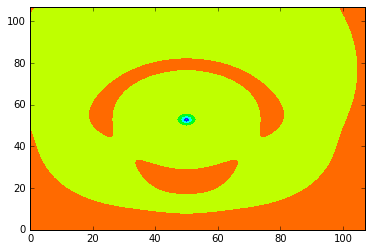

cmap =inferno


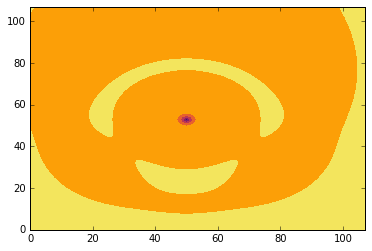

cmap =inferno_r


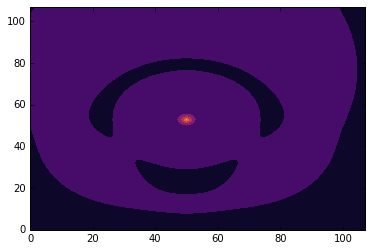

cmap =jet


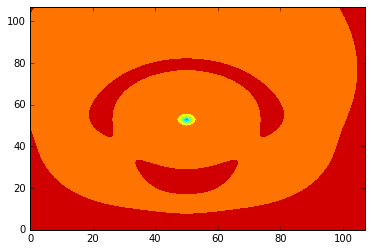

cmap =jet_r


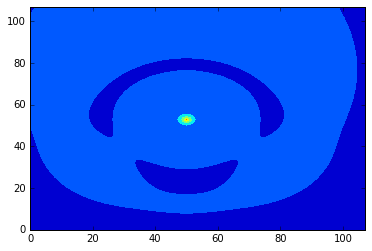

cmap =magma


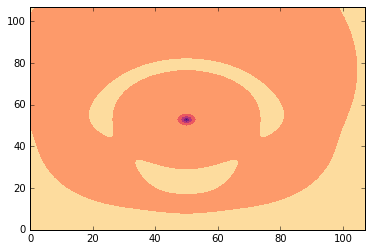

cmap =magma_r


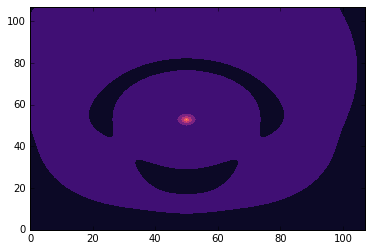

cmap =nipy_spectral


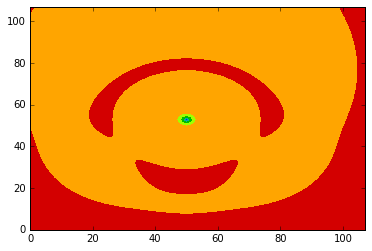

cmap =nipy_spectral_r


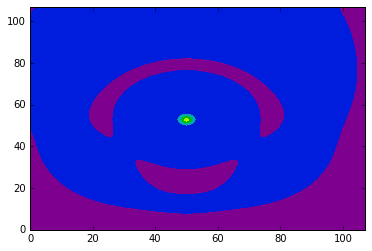

cmap =ocean


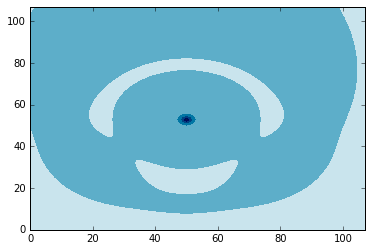

cmap =ocean_r


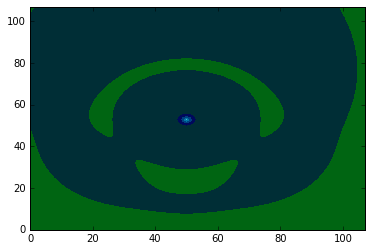

cmap =pink


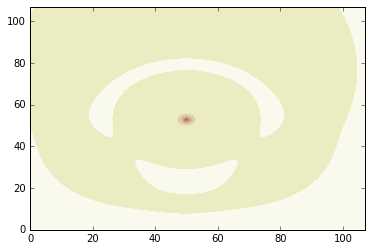

cmap =pink_r


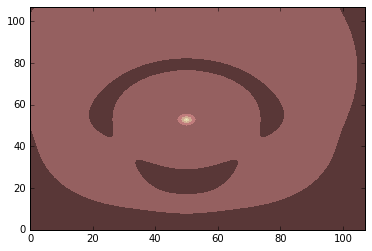

cmap =plasma


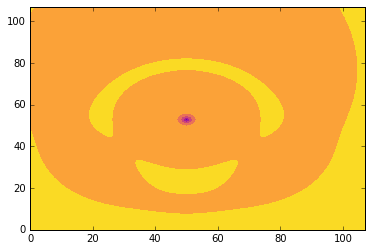

cmap =plasma_r


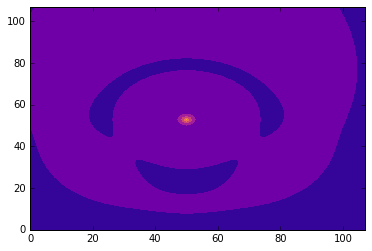

cmap =prism


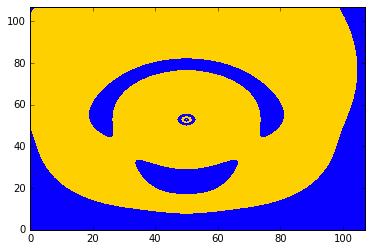

cmap =prism_r


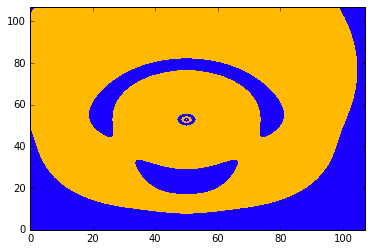

cmap =rainbow


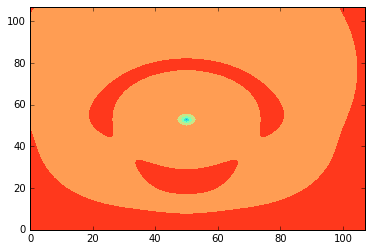

cmap =rainbow_r


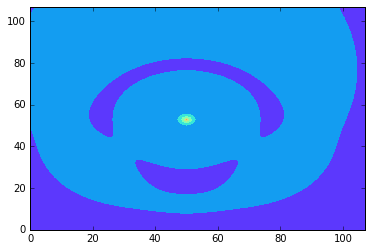

cmap =seismic


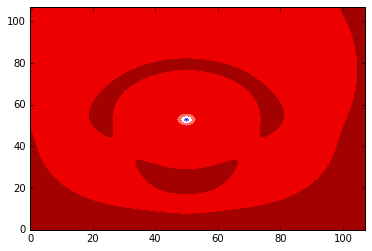

cmap =seismic_r


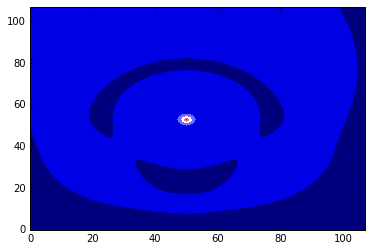

cmap =spectral


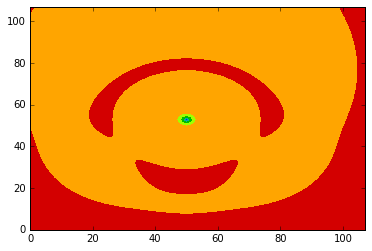

cmap =spectral_r


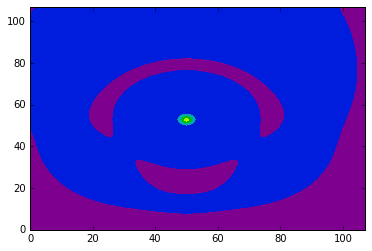

cmap =spring


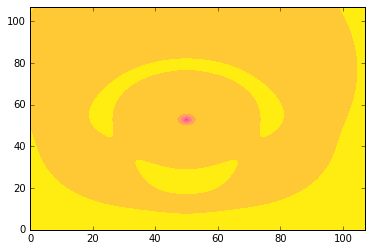

cmap =spring_r


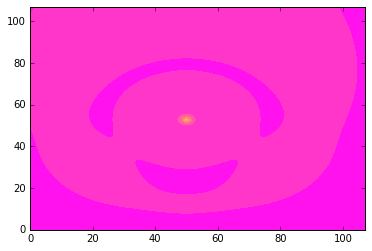

cmap =summer


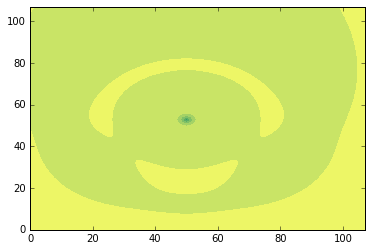

cmap =summer_r


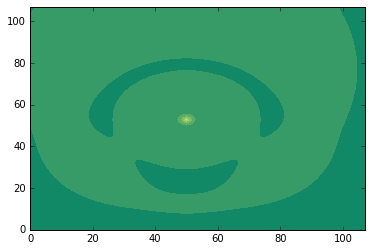

cmap =terrain


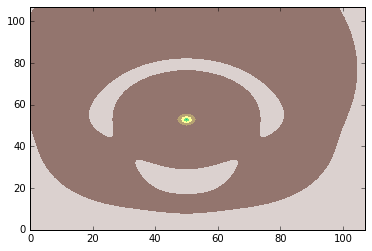

cmap =terrain_r


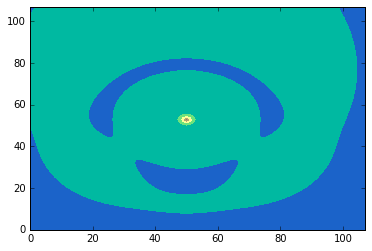

cmap =viridis


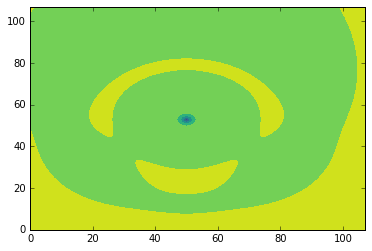

cmap =viridis_r


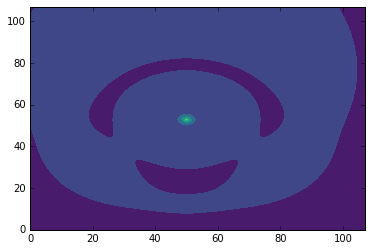

cmap =winter


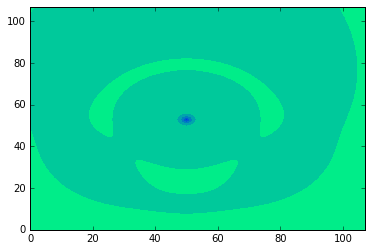

cmap =winter_r


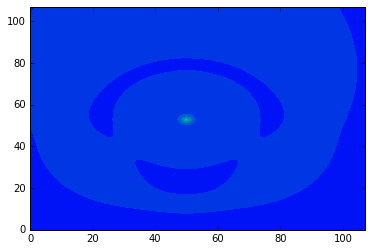

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
fig4a = plt.figure()
nbins=25
leveltot = plt.MaxNLocator(nbins=nbins).tick_values(diff.min(), diff.max())
#cf=plt.contourf(ymat,zmat ,diff)
transdiff=diff.transpose()
cmaplist=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 
          'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 
          'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr',
          'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 
          'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 
          'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 
          'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r',
          'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 
          'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'terrain', 'terrain_r', 'viridis', 
          'viridis_r', 'winter', 'winter_r']
for onecmap in cmaplist:
    print('cmap ='+onecmap)
    cmap = plt.cm.get_cmap(onecmap)
    cf=plt.contourf(transdiff,cmap=cmap)
    #plt.axis([-2, 2, -2, 2])

    fig4a.colorbar(cf)
    plt.show()

In [10]:
### import numpy as np
from tools import getdens


h2o_scf_sp_req_mo3=getdens("h2o_scf_sp_req_mo3.cub")
h2o_scf_sp_req_500_mo3=getdens("h2o_scf_sp_req_500_mo3.cub")        
diff=np.array(h2o_scf_sp_req_500_mo3, dtype=float)-np.array(h2o_scf_sp_req_mo3, dtype=float)
diff=diff.transpose()

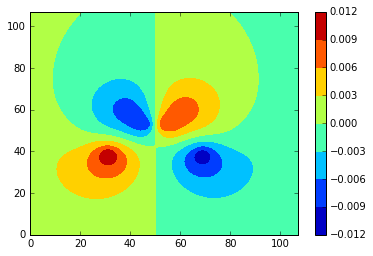

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
fig4a = plt.figure()
fig4a.canvas.set_window_title('spectre canal')
nbins=25
leveltot = plt.MaxNLocator(nbins=nbins).tick_values(diff.min(), diff.max())
#cf=plt.contourf(ymat,zmat ,diff)
cmap = plt.cm.get_cmap('gist_heat')
cf=plt.contourf(diff)
#plt.axis([-xmin, xmin, -zmin, zmin])
fig4a.colorbar(cf)
plt.savefig('diff_500_mo3.png')
plt.show()

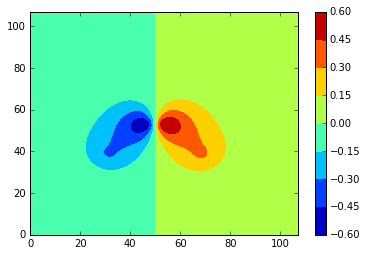

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 
fig4a = plt.figure()
fig4a.canvas.set_window_title('spectre canal')
nbins=25

leveltot = plt.MaxNLocator(nbins=nbins).tick_values(diff.min(), diff.max())
#cf=plt.contourf(ymat,zmat ,diff)
cmap = plt.cm.get_cmap('gist_heat')
h2o_scf_sp_req_500_mo3_trans=np.array(h2o_scf_sp_req_500_mo3)
#h2o_scf_sp_req_500_mo3=h2o_scf_sp_req_500_mo3.transpose()
cf=plt.contourf(h2o_scf_sp_req_500_mo3_trans)
#plt.axis([-xmin, xmin, -zmin, zmin])
fig4a.colorbar(cf)
plt.savefig('500_mo3.png')
plt.show()

In [36]:
### import numpy as np
from tools import getdens


h2o_scf_sp_req_mo4=getdens("h2o_scf_sp_req_mo4.cub")
h2o_scf_sp_req_500_mo4=getdens("h2o_scf_sp_req_500_mo4.cub")        
diff=np.array(h2o_scf_sp_req_500_mo4, dtype=float)-np.array(h2o_scf_sp_req_mo4, dtype=float)


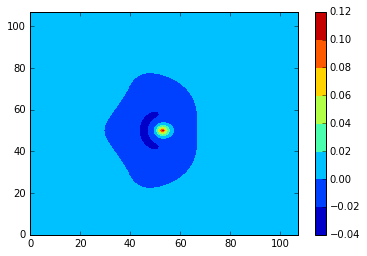

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline 
fig4a = plt.figure()
fig4a.canvas.set_window_title('spectre canal')
#cmap=gist_heat
nbins=25
leveltot = plt.MaxNLocator(nbins=nbins).tick_values(diff.min(), diff.max())
#cf=plt.contourf(ymat,zmat ,diff)
cf=plt.contourf(diff)
#plt.axis([-xmin, xmin, -zmin, zmin])
fig4a.colorbar(cf)
plt.show()